1. Create a directed graph
2. Divides directed graph into subsets
3. Create functionality to iterate through all possible combinations of True/False/0 values - the CPT
4. Start at one node
5. Calculate marginal probability of that node given its parents
6. For each parent of that node, calculate the product that parent node given its parents
7. Multiply that product by the marginal prodb in step 5
8. Repeat for all possible value combinations of the query node and its parents and their parents
9. Repeat for all nodes in the subgraph (with parents?)
10. Iterate through each subgraph

In [1]:
from margprob import *
import similarityfunctions
import itertools as it

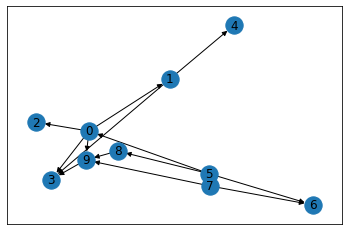

In [2]:
dg = makeDirectedGraph(10, 15)
nx.draw_networkx(dg)

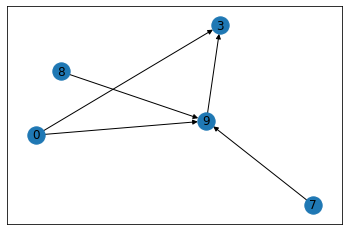

In [3]:
# create subgraph
graph_nodes = list(dg.nodes())

# for functionality, make graph for each node and iterate through using a for loop
subdg = getSubset(dg, 9)
nx.draw_networkx(subdg)

In [4]:
# create CPT - get all possible combinations of truth values
values = [True, bool(False), int(0)]
sub_nodes = list(subdg.nodes())
CPT = list(it.product(values, repeat=len(sub_nodes)))
print(CPT)


"""parents = list(dg.predecessors(9))
num_parents = len(parents)

list_outcomes =[]
for i in range(num_parents):
    list_outcomes.append(possible_outcomes)
    
print(list_outcomes)"""

[(True, True, True, True, True), (True, True, True, True, False), (True, True, True, True, 0), (True, True, True, False, True), (True, True, True, False, False), (True, True, True, False, 0), (True, True, True, 0, True), (True, True, True, 0, False), (True, True, True, 0, 0), (True, True, False, True, True), (True, True, False, True, False), (True, True, False, True, 0), (True, True, False, False, True), (True, True, False, False, False), (True, True, False, False, 0), (True, True, False, 0, True), (True, True, False, 0, False), (True, True, False, 0, 0), (True, True, 0, True, True), (True, True, 0, True, False), (True, True, 0, True, 0), (True, True, 0, False, True), (True, True, 0, False, False), (True, True, 0, False, 0), (True, True, 0, 0, True), (True, True, 0, 0, False), (True, True, 0, 0, 0), (True, False, True, True, True), (True, False, True, True, False), (True, False, True, True, 0), (True, False, True, False, True), (True, False, True, False, False), (True, False, True, Fal

'parents = list(dg.predecessors(9))\nnum_parents = len(parents)\n\nlist_outcomes =[]\nfor i in range(num_parents):\n    list_outcomes.append(possible_outcomes)\n    \nprint(list_outcomes)'

In [5]:
# graph all possible outcomes for the subgraph
# dictionary for each outcome: {query node : value, parent1 : value, ... parent_n : value}

list_outcomes = []
for i in CPT:
    list_outcomes.append(dict(zip(sub_nodes, i)))
print(list_outcomes)
        
    

[{0: True, 3: True, 7: True, 8: True, 9: True}, {0: True, 3: True, 7: True, 8: True, 9: False}, {0: True, 3: True, 7: True, 8: True, 9: 0}, {0: True, 3: True, 7: True, 8: False, 9: True}, {0: True, 3: True, 7: True, 8: False, 9: False}, {0: True, 3: True, 7: True, 8: False, 9: 0}, {0: True, 3: True, 7: True, 8: 0, 9: True}, {0: True, 3: True, 7: True, 8: 0, 9: False}, {0: True, 3: True, 7: True, 8: 0, 9: 0}, {0: True, 3: True, 7: False, 8: True, 9: True}, {0: True, 3: True, 7: False, 8: True, 9: False}, {0: True, 3: True, 7: False, 8: True, 9: 0}, {0: True, 3: True, 7: False, 8: False, 9: True}, {0: True, 3: True, 7: False, 8: False, 9: False}, {0: True, 3: True, 7: False, 8: False, 9: 0}, {0: True, 3: True, 7: False, 8: 0, 9: True}, {0: True, 3: True, 7: False, 8: 0, 9: False}, {0: True, 3: True, 7: False, 8: 0, 9: 0}, {0: True, 3: True, 7: 0, 8: True, 9: True}, {0: True, 3: True, 7: 0, 8: True, 9: False}, {0: True, 3: True, 7: 0, 8: True, 9: 0}, {0: True, 3: True, 7: 0, 8: False, 9: 

In [6]:
def CPT(graph, values):
    nodes = list(graph.nodes())
    CPT = list(it.product(values, repeat=len(nodes)))
    return CPT

def possibleOutcomes(graph, values):
    nodes = list(graph.nodes())
    cpt = CPT(graph, values)
    
    list_outcomes = []
    for i in cpt:
        list_outcomes.append(dict(zip(nodes, i)))
    return list_outcomes

In [7]:
print(possibleOutcomes(subdg, values))

[{0: True, 3: True, 7: True, 8: True, 9: True}, {0: True, 3: True, 7: True, 8: True, 9: False}, {0: True, 3: True, 7: True, 8: True, 9: 0}, {0: True, 3: True, 7: True, 8: False, 9: True}, {0: True, 3: True, 7: True, 8: False, 9: False}, {0: True, 3: True, 7: True, 8: False, 9: 0}, {0: True, 3: True, 7: True, 8: 0, 9: True}, {0: True, 3: True, 7: True, 8: 0, 9: False}, {0: True, 3: True, 7: True, 8: 0, 9: 0}, {0: True, 3: True, 7: False, 8: True, 9: True}, {0: True, 3: True, 7: False, 8: True, 9: False}, {0: True, 3: True, 7: False, 8: True, 9: 0}, {0: True, 3: True, 7: False, 8: False, 9: True}, {0: True, 3: True, 7: False, 8: False, 9: False}, {0: True, 3: True, 7: False, 8: False, 9: 0}, {0: True, 3: True, 7: False, 8: 0, 9: True}, {0: True, 3: True, 7: False, 8: 0, 9: False}, {0: True, 3: True, 7: False, 8: 0, 9: 0}, {0: True, 3: True, 7: 0, 8: True, 9: True}, {0: True, 3: True, 7: 0, 8: True, 9: False}, {0: True, 3: True, 7: 0, 8: True, 9: 0}, {0: True, 3: True, 7: 0, 8: False, 9: 

In [8]:
# iterate through all possible outcomes
sub_nodes = list(subdg.nodes())
for scenario in list_outcomes:
    for node in sub_nodes:
        node_value = scenario.get(node)
        
        #assign value to node in graph
        subdg.nodes[node]['value'] = node_value

In [9]:
# pick a node, calculate the min marg prob
for node in sub_nodes:
    parents = list(subdg.predecessors(node))
    
    observed_nodes = getObservedNodes(subdg)
    observed_evidence = list(set(parents) & set(observed_nodes))
    
    false_nodes = getUnobservedNodes(subdg)
    false_evidence = list(set(parents) & set(false_nodes))
    
    #calculate prob of node given parents
    if not observed_evidence:
        minMarg = 0
    else:
        cp = []
        for false in false_evidence:
            true_weight = subdg.edges[false][node]['weight']
            changed_weight = 1-true_weight
            subdg.edges[false][node]['weight'] = changed_weight
            cp.append(subdg.edges[false][node]['weight'])
        for true in evidence:
            weight = subdg.edges[true][node]['weight']
            cp.append(weight)

        margprob = numpy.prod(cp)

In [10]:
# pick a node, calculate the min marg prob
def margParents(dg, node):
    parents = list(dg.predecessors(node))
    
    observed_nodes = getObservedNodes(subdg)
    observed_evidence = list(set(parents) & set(observed_nodes))
    
    false_nodes = getUnobservedNodes(subdg)
    false_evidence = list(set(parents) & set(false_nodes))
    
    #calculate prob of node given parents
    if not parents:
        margprob = 0
    else:
        cp = []
        for p in parents:
            weight = dg[p][node]['weight']
            cp.append(weight)

        margprob = numpy.prod(cp)
    return margprob

In [11]:
print(margParents(dg, 9))

0.24901949958978997


In [12]:
def minMargInterval(dg, values, node):
    subdg = getSubset(dg, node)
    worlds = possibleOutcomes(subdg, values)
    
    sub_nodes = list(subdg.nodes())
    parents = list(subdg.predecessors(node))
    ancestors = list(set(nx.ancestors(subdg, node)) - set(parents))
    
    margprobs = []
    minMarg = []
    for w in worlds:
        
        for node in sub_nodes:
            node_value = w.get(node)
            subdg.nodes[node]['value'] = node_value
        
        marg1 = margParents(subdg, node)
        margprobs.append(marg1)

        marg2 = [margParents(dg, p) for p in parents]
        marg3 = [margParents(dg, a) for a in ancestors]
        margprobs + marg2 + marg3
        
        node_marg = numpy.prod(margprobs)
        minMarg.append(node_marg)
        
    #Lessam_min = sum(minMarg)
    return numpy.sum(minMarg)
            

In [13]:
for node in list(dg.nodes()):
    #print(minMargInterval(dg, values, node))
    minMargInterval(dg, values, node)

In [14]:
# pick a node, calculate the min marg prob
def margChildren(dg, node):
    children = list(dg.successors(node))
    
    #calculate prob of children given node
    if not children:
        margprob = 0
    else:
        cp = []
        for c in children:
            weight = dg[node][c]['weight']
            cp.append(weight)

        margprob = numpy.prod(cp)
    return margprob

In [15]:
def maxMargInterval(dg, values, node):
    subdg = getSubset(dg, node)
    worlds = possibleOutcomes(subdg, values)
    
    sub_nodes = list(subdg.nodes())
    children = list(subdg.predecessors(node))
    descendants = list(set(nx.descendants(subdg, node)) - set(children))
    
    margprobs = []
    maxMarg = []
    for w in worlds:
        for node in sub_nodes:
            node_value = w.get(node)
            subdg.nodes[node]['value'] = node_value
            
        marg1 = margChildren(subdg, node)
        margprobs.append(marg1)

        marg2 = [margChildren(dg, c) for c in children]
        marg3 = [margChildren(dg, d) for d in descendants]
        margprobs + marg2 + marg3
        node_marg = numpy.prod(margprobs)
        
        maxMarg.append(node_marg)
        
    #Lessam_min = sum(minMarg)
    return numpy.sum(maxMarg)
            

In [16]:
for node in list(dg.nodes()):
    print(maxMargInterval(dg, values, node))

2.5297785082406774
0
0
0.29640600399204564
0
0
0.11560162749101797
0.06367617930575255
1.6766067773650375
2.5297785082406774


In [17]:
# returns the interval-valued marginal probability of a hidden node 
def LessamInterval(dg, values, node):
    lower_bound = minMargInterval(dg, values, node)
    upper_bound = maxMargInterval(dg, values, node)
    marg_prob_interval = [lower_bound, upper_bound] #portion.closed(lower_bound, upper_bound)
    return marg_prob_interval


In [18]:
for n in list(dg.nodes()):
    print(LessamInterval(dg, values, n))

[1.0307483520311516, 2.5297785082406774]
[3.3949300105370774, 0]
[1.7225897608055993, 0]
[0.36049094499535383, 0.29640600399204564]
[3.0624691067659615, 0]
[1.6766122640037726, 0]
[0, 0.11560162749101797]
[0, 0.06367617930575255]
[0, 1.6766067773650375]
[0.33159249734682517, 2.5297785082406774]
